### Testing the data and performing data visualization and sample queries

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_barchart(tuples,xlabel,ylabel,title,sorting=False):
    """
    - plot bar chart using list of tuples returned by psycopg cursor and labels
    """
    if sorting:
        tuples.sort()
    data = [ tpl[1] for tpl in tuples ]
    labels = [ str(tpl[0]) for tpl in tuples ]
    plt.xticks(range(len(data)), labels)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.bar(range(len(data)), data) 
    plt.show()

In [3]:
def postgres_to_pandas(cur,table_name):
    """
    - loads postgreSQL table of given name into Pandas Dataframe using cursor
    - returns Pandas Dataframe
    """
    cur.execute("SELECT * FROM "+table_name,[])
    cols = []
    for elt in cur.description:
        cols.append( elt[0] )
    return pd.DataFrame(data=cur.fetchall(), columns=cols )

In [4]:
def sql_to_pandas(cur,query):
    """
    - loads results of given SQL query to posgreSQL into Pandas Dataframe, using cursor
    - returns Pandas Dataframe
    """
    cur.execute(query,[])
    cols = []
    for elt in cur.description:
        cols.append( elt[0] )
    return pd.DataFrame(data=cur.fetchall(), columns=cols )

In [5]:
conn = psycopg2.connect("host=127.0.0.1 dbname=immigdb user=student password=student")
cur = conn.cursor()

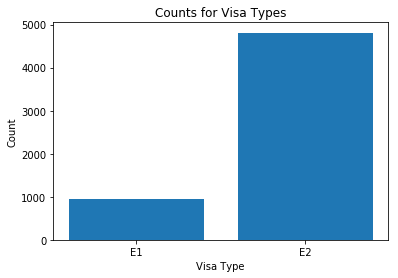

In [6]:
cur.execute("SELECT Visa_Type, COUNT(*) FROM immigrationfacts GROUP BY Visa_Type ORDER BY Visa_Type",[])
res = cur.fetchall()
plot_barchart(res,'Visa Type','Count','Counts for Visa Types')

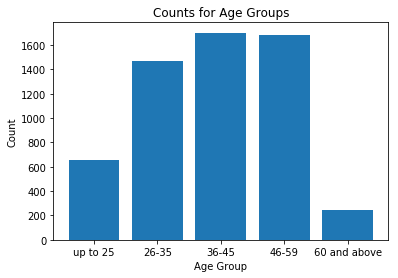

In [7]:
query = "SELECT A.description, COUNT(*) FROM immigrationfacts AS I INNER JOIN "
query += "agegroups AS A ON I.Age_Group = A.agegroup_num GROUP BY A.agegroup_num ORDER BY A.agegroup_num"
cur.execute(query,[])
res = cur.fetchall()
plot_barchart(res,'Age Group','Count','Counts for Age Groups')

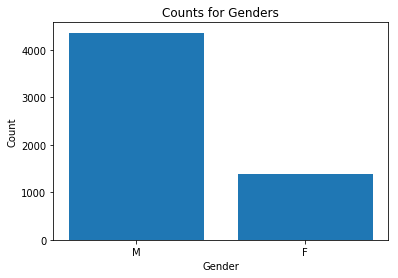

In [8]:
cur.execute("SELECT Gender, COUNT(*) FROM immigrationfacts GROUP BY Gender",[])
res = cur.fetchall()
plot_barchart(res,'Gender','Count','Counts for Genders')

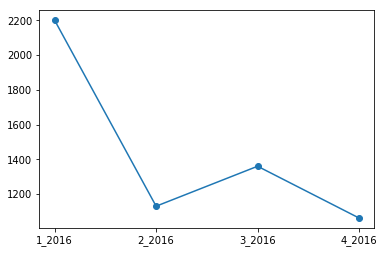

In [9]:
cur.execute("SELECT Monthly_Time, COUNT(*) FROM immigrationfacts WHERE Year=2016 GROUP BY Monthly_Time ORDER BY Monthly_Time",[])
res = cur.fetchall()
x = [ v[0] for v in res ]
y = [ v[1] for v in res ]
plt.plot(x,y,marker="o")
plt.show()

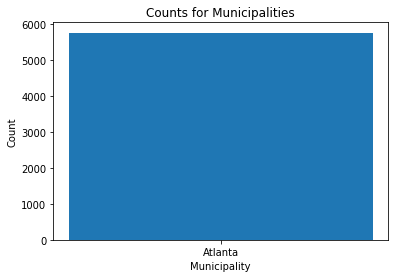

In [10]:
cur.execute("SELECT Airport_Municipality, COUNT(*) FROM immigrationfacts GROUP BY Airport_Municipality",[])
res = cur.fetchall()
plot_barchart(res,'Municipality','Count','Counts for Municipalities')

In [11]:
cur.execute("SELECT AVG(Age) FROM immigrationfacts",[])
res = round(cur.fetchone()[0])
print('Average Age : ',res)

Average Age :  39


In [12]:
cur.execute("SELECT AVG(Age) FROM immigrationfacts WHERE Age_Group = 2",[])
res =  round(cur.fetchone()[0])
print('Average Age for Age Group 2 : ',res)

Average Age for Age Group 2 :  31


In [13]:
cur.execute("SELECT AVG(Age) FROM immigrationfacts WHERE Gender = 'F'",[])
res =  round(cur.fetchone()[0])
print('Average Age for Females : ',res)

Average Age for Females :  34


In [14]:
airports_df = postgres_to_pandas(cur,'airports')

In [15]:
airports_df.head(4)

,airport_code,airport_type,name,municipality
0,ABY,medium_airport,Southwest Georgia Regional Airport,Albany
1,AGS,large_airport,Augusta Regional At Bush Field,Augusta
2,AHN,medium_airport,Athens Ben Epps Airport,Athens
3,ATL,large_airport,Hartsfield Jackson Atlanta International Airport,Atlanta


In [16]:
airlines_df = postgres_to_pandas(cur,'airlines')

In [17]:
airlines_df.head(4)

,airline_code,airline_name,airline_country
0,1T,1Time Airline,South Africa
1,Q5,40-Mile Air,United States
2,AN,Ansett Australia,Australia
3,1B,Abacus International,Singapore


In [18]:
visatypes_df = postgres_to_pandas(cur,'visatypes')

In [19]:
visatypes_df.head()

,visa_code,description
0,E1,Employment First Preference (E1): Priority Wor...
1,E2,Employment Second Preference (E2): Professiona...
2,E3,Employment Third Preference (E3): Skilled Work...


In [20]:
genders_df = postgres_to_pandas(cur,'genders')

In [21]:
genders_df.head()

,gender_code,description
0,M,Male
1,F,Female
2,X,X-Gender
3,U,Unspecified


In [22]:
agegroups_df = postgres_to_pandas(cur,'agegroups')

In [23]:
agegroups_df.head()

,agegroup_num,description
0,1,up to 25
1,2,26-35
2,3,36-45
3,4,46-59
4,5,60 and above


In [24]:
municipalities_df = postgres_to_pandas(cur,'municipalities')

In [25]:
municipalities_df.head(5)

,municipality
0,Albany
1,Augusta
2,Athens
3,Atlanta
4,Brunswick


In [26]:
years_df = postgres_to_pandas(cur,'years')

In [27]:
years_df.head()

,year
0,2016


In [28]:
months_df = postgres_to_pandas(cur,'months')

In [29]:
months_df.head()

,month_num,month_name
0,1,Jan
1,2,Feb
2,3,Mar
3,4,Apr


In [30]:
monthlytimes_df = postgres_to_pandas(cur,'monthlytimes')

In [31]:
monthlytimes_df.head()

,monthlytime,year,month_num
0,1_2016,2016,1
1,2_2016,2016,2
2,3_2016,2016,3
3,4_2016,2016,4


In [32]:
query = "SELECT I.CICID,I.Monthly_Time,I.Flight_Number,A.airline_code,A.airline_name,A.airline_country"
query += " FROM immigrationfacts AS I INNER JOIN airlines AS A ON I.Airline_Code = A.airline_code LIMIT 5"
df = sql_to_pandas(cur,query)

In [33]:
df.head(5)

,cicid,monthly_time,flight_number,airline_code,airline_name,airline_country
0,5002378,1_2016,05009,EV,Atlantic Southeast Airlines,United States
1,2675382,1_2016,05002,EV,Atlantic Southeast Airlines,United States
2,936867,1_2016,05498,EV,Atlantic Southeast Airlines,United States
3,5311468,1_2016,05009,EV,Atlantic Southeast Airlines,United States
4,549091,1_2016,05481,EV,Atlantic Southeast Airlines,United States


In [34]:
query = "SELECT * FROM immigrationfacts INNER JOIN airports ON immigrationfacts.Airport_Code = airports.airport_code LIMIT 5"
df = sql_to_pandas(cur,query)

In [35]:
df.head(5)

,cicid,year,month,day,monthly_time,visa_type,gender,age,age_group,airport_code,airport_municipality,adm_number,airline_code,flight_number,airport_code,airport_type,name,municipality
0,5002378,2016,1,27,1_2016,E2,M,50,4,ATL,Atlanta,86590964230,EV,05009,ATL,large_airport,Hartsfield Jackson Atlanta International Airport,Atlanta
1,2675382,2016,1,14,1_2016,E2,M,34,2,ATL,Atlanta,85429452230,EV,05002,ATL,large_airport,Hartsfield Jackson Atlanta International Airport,Atlanta
2,936867,2016,1,5,1_2016,E1,F,40,3,ATL,Atlanta,84517594430,EV,05498,ATL,large_airport,Hartsfield Jackson Atlanta International Airport,Atlanta
3,5311468,2016,1,29,1_2016,E2,M,38,3,ATL,Atlanta,86770747330,EV,05009,ATL,large_airport,Hartsfield Jackson Atlanta International Airport,Atlanta
4,549091,2016,1,3,1_2016,E2,M,3,1,ATL,Atlanta,84290278530,EV,05481,ATL,large_airport,Hartsfield Jackson Atlanta International Airport,Atlanta


In [36]:
cur.execute("SELECT COUNT(*) FROM immigrationfacts",[])
res = int(cur.fetchone()[0])
print('Total Immigration Records : ',res)

Total Immigration Records :  5752


In [37]:
conn.close()